# ANN (Artificial Neural Network)

- Artificial neural networks are one of the main tools used in machine learning. As the “neural” part   of their name suggests, they are brain-inspired systems that are intended to replicate the way that   we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a     hidden layer consisting of units that transform the input into something that the output layer can     use. They are excellent tools for finding patterns that are far too complex or numerous for a human   programmer to extract and teach the machine to recognize.


- While neural networks (also called “perceptrons”) have been around since the 1940s, it is only in     the last several decades where they have become a major part of artificial intelligence. This is due   to the arrival of a technique called “backpropagation,” which allows networks to adjust their hidden   layers of neurons in situations where the outcome doesn’t match what the creator is hoping for —       like a network designed to recognize dogs, which misidentifies a cat, for example.


- Another important advance has been the arrival of deep learning neural networks, in which different   layers of a multilayer network extract different features until it can recognize what it is looking   for.


- An artificial neuron network (neural network) is a computational model that mimics the way nerve       cells work in the human brain.


- Artificial neural networks (ANNs) use learning algorithms that can independently make adjustments -   or learn, in a sense - as they receive new input. This makes them a very effective tool for non-       linear statistical data modeling.

# Structure of ANN

- An artificial neural network has three or more layers that are interconnected. The first layer         consist of neurons. those neurons send data on to the deeper layers, which in turn will send the       final ouput data to the last output layer.


- All the inner layers are hidden and are formed by units which adaptively change the information       received from layer to layer through a series of transformations. Each layer acts both as an input     and output layer that allows the ANN to understand more complex objects. Collectively, these inner     layers are called the neural layer.

**Components of ANN**

1. Inputs/Input Layer
2. Weights
3. Bias
4. Perceptron/Neuron
5. Hidden layer
6. Output layer
7. Activation Functions
8. Optimizers
9. Loss functions

# Gradient Descent Optimizer

In [1]:
import numpy as np 
from sklearn.metrics import mean_squared_error

In [2]:
x = np.array([1,2,3,4])
y = np.array([10,12,20,25])

In [3]:
def gradient_descent (x,y):
    weight = 0.1
    bias = 0.1
    learning_rate = 0.05
    n = len(x)
    iteration = 100
    
    # Forword Propogation
    for i in range(iteration):
        ypred = weight*x-bias
        mse = mean_squared_error(y, ypred)
        
        # Backword Propogation
        dw = -(2/n)*sum(x*(y-ypred))
        db = -(2/n)*sum(y-ypred)
        
        # Update the weights and bias
        weight = weight - (learning_rate*dw)
        bias = bias - (learning_rate*db)
        
        print(f"Iteration:{i}, weight is: {weight}, Bias is: {bias},MSE is: {mse}")

In [4]:
gradient_descent(x,y)

Iteration:0, weight is: 4.9, Bias is: 1.7600000000000002,MSE is: 310.935
Iteration:1, weight is: 6.515000000000001, Bias is: 2.386,MSE is: 40.96259999999999
Iteration:2, weight is: 7.07525, Bias is: 2.6708499999999997,MSE is: 11.534233499999994
Iteration:3, weight is: 7.286525, Bias is: 2.8441224999999997,MSE is: 8.516726628750003
Iteration:4, weight is: 7.382661875, Bias is: 2.9819034999999996,MSE is: 8.40621236563125
Iteration:5, weight is: 7.44114134375, Bias is: 3.1094283812499994,MSE is: 8.6231101407558
Iteration:6, weight is: 7.487642431249999, Bias is: 3.2350858834374994,MSE is: 8.884588602994599
Iteration:7, weight is: 7.530682078671875, Bias is: 3.361683863968749,MSE is: 9.159929126215838
Iteration:8, weight is: 7.573091485660156, Bias is: 3.4901817306976555,MSE is: 9.446098345522818
Iteration:9, weight is: 7.615818304089453, Bias is: 3.620927032352382,MSE is: 9.743114518204413
Iteration:10, weight is: 7.659186334110459, Bias is: 3.754065159565257,MSE is: 10.051344113719855
It

# Artificial Neural Network

# Classification

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf 
import pandas as pd 
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('Classification.csv')
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [8]:
x = df.iloc[:,:-1]
y = df['Exited']

In [9]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [11]:
# Initialize model
ann = Sequential()

# Add hidden layer
ann.add(Dense(units = 6, activation = 'relu'))

# Add output layer
ann.add(Dense(units = 1, activation = 'sigmoid'))

# Establish connections
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Train the model
ann.fit(xtrain, ytrain, epochs = 50)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.7875
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5599
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4941
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4657
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4499
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4407
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4346
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4285
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4216
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4128
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4032
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3936
Epoch 13/50
250/250 [====

In [12]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5
ypred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1585
           1       0.78      0.41      0.54       415

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.85      0.84      2000



# Regression

In [14]:
df = pd.read_csv('Regression.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130012,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720993,1001.451646,998.847605
998,403.315576,1000.771023,998.562851


In [15]:
sc = StandardScaler()

In [16]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
x = sc.fit_transform(x)

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2,random_state = 1)

In [21]:
ann = Sequential()

ann.add(Dense(units = 30, activation = 'relu'))
ann.add(Dense(units = 20, activation = 'relu'))

ann.add(Dense(units = 1))

ann.compile(optimizer = 'adam', loss = 'mse')

ann.fit(xtrain, ytrain, epochs = 250)

Epoch 1/250
25/25 [==============================] - 1s 3ms/step - loss: 256470.6406
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 255996.6875
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 255612.9219
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 255194.5625
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 254626.6406
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 253858.6250
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 252816.5000
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 251403.4844
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 249525.9062
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 247106.6562
Epoch 11/250
25/25 [==============================] - 0s 3ms/step - loss: 244043.0469
Epoch 12/250
25/25 [==============================] - 0s 3ms/st

<AxesSubplot:>

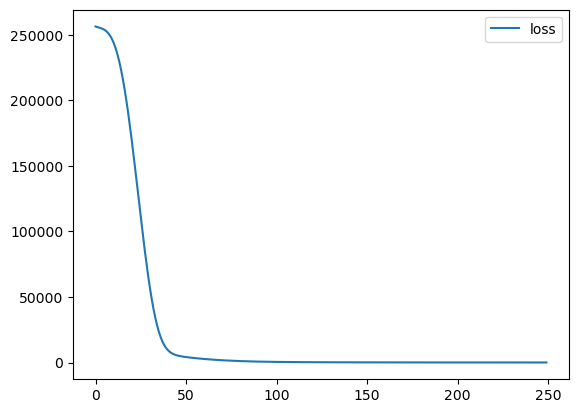

In [22]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [20]:
ypred = ann.predict(xtest)
ypred

7/7 [==============================] - 0s 3ms/step


array([[441.2469 ],
       [493.38638],
       [464.18494],
       [507.91266],
       [681.4941 ],
       [386.51865],
       [482.1076 ],
       [360.69174],
       [792.82635],
       [502.76367],
       [450.75784],
       [474.34668],
       [464.17212],
       [402.91757],
       [517.14417],
       [471.32556],
       [548.1498 ],
       [518.65204],
       [450.15414],
       [466.02707],
       [487.2718 ],
       [616.8525 ],
       [402.68655],
       [570.61395],
       [377.93106],
       [489.81763],
       [374.4109 ],
       [492.3751 ],
       [511.87567],
       [348.31006],
       [421.3067 ],
       [670.9102 ],
       [531.49664],
       [508.4935 ],
       [581.4837 ],
       [535.5962 ],
       [405.34674],
       [543.9863 ],
       [622.046  ],
       [501.5099 ],
       [372.59235],
       [791.63043],
       [492.63763],
       [499.54907],
       [505.36597],
       [466.56754],
       [504.89212],
       [512.1096 ],
       [559.4137 ],
       [430.85168],
